In [ ]:
# Install latest pre-release version of bigdl-chronos 
# Installing bigdl-chronos from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade bigdl-chronos[all]
!pip uninstall -y torchtext # uninstall torchtext to avoid version conflict
exit() # restart the runtime to refresh installed pkg

     |████████████████████████████████| 222 kB 4.0 MB/s 
     |████████████████████████████████| 2.2 MB 53.3 MB/s 
     |████████████████████████████████| 23.6 MB 1.2 MB/s 
     |████████████████████████████████| 35.4 MB 373 kB/s 
     |████████████████████████████████| 100.7 MB 39 kB/s 
     |████████████████████████████████| 71.0 MB 285 bytes/s 
     |████████████████████████████████| 218.4 MB 52 kB/s 
     |████████████████████████████████| 85 kB 3.5 MB/s 
     |████████████████████████████████| 57.6 MB 1.2 MB/s 
     |████████████████████████████████| 1.1 MB 58.6 MB/s 
     |████████████████████████████████| 65 kB 3.6 MB/s 
     |████████████████████████████████| 94 kB 3.4 MB/s 
     |████████████████████████████████| 144 kB 68.8 MB/s 
     |████████████████████████████████| 271 kB 70.5 MB/s 
     |████████████████████████████████| 197 kB 59.8 MB/s 
     |████████████████████████████████| 173 kB 60.5 MB/s 
     |████████████████████████████████| 202 kB 59.3 MB/s 
     |████████████

In [ ]:
import pandas as pd
import urllib.request
import json
import math

## Get data

In [ ]:
f = open('data.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)
 
# Iterating through the json
# list
with open('data.json', 'w') as f:
    json.dump(data['data'], f)

data = pd.read_json('data.json')
data

,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
0,VCB,2022-01-20,14:44:39,HOSE,STOCK,86.8,92.8,80.8,85.2,87.5,83.1,87.1,85.664388,85.200,87.500,83.100,87.100,85.664388,2794300,239372000000,0,0,0.3,0.3000,0.3456
1,VCB,2022-01-19,15:01:02,HOSE,STOCK,87.6,93.7,81.5,87.5,87.5,85.0,86.8,86.330000,87.500,87.500,85.000,86.800,86.330000,914800,78972420000,500000,41500000000,-0.8,-0.8000,-0.9132
2,VCB,2022-01-18,15:01:03,HOSE,STOCK,86.2,92.2,80.2,85.5,87.6,84.0,87.6,86.350000,85.500,87.600,84.000,87.600,86.350000,1696600,146506850000,39000,3412500000,1.4,1.4000,1.6241
3,VCB,2022-01-17,15:01:03,HOSE,STOCK,83.4,89.2,77.6,83.0,88.0,82.3,86.2,85.640000,83.000,88.000,82.300,86.200,85.640000,2628500,225104290000,40030,3476541000,2.8,2.8000,3.3573
4,VCB,2022-01-14,15:01:03,HOSE,STOCK,81.9,87.6,76.2,81.9,83.4,81.0,83.4,82.770000,81.900,83.400,81.000,83.400,82.770000,1522100,125980020000,30000,2307000000,1.5,1.5000,1.8315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,VCB,2013-01-08,14:01:05,HOSE,STOCK,30.0,31.5,28.5,30.6,31.5,30.1,31.5,30.809000,12.872,13.251,12.663,13.251,12.959000,1035220,31894000000,0,0,1.5,0.6310,5.0000
2255,VCB,2013-01-07,14:01:04,HOSE,STOCK,29.2,30.6,27.8,28.0,30.0,28.0,30.0,29.373000,11.779,12.620,11.779,12.620,12.357000,1312740,38559000000,0,0,0.8,0.3365,2.7397
2256,VCB,2013-01-04,14:01:07,HOSE,STOCK,28.5,29.9,27.1,28.0,29.5,27.8,29.2,28.821000,11.779,12.410,11.695,12.283,12.124000,501540,14455000000,0,0,0.7,0.2945,2.4561
2257,VCB,2013-01-03,14:01:06,HOSE,STOCK,27.8,29.1,26.5,27.9,28.5,27.0,28.5,28.050000,11.737,11.989,11.358,11.989,11.801000,500650,14043000000,0,0,0.7,0.2945,2.5180


In [ ]:
data.sort_values(by="date", ignore_index=True, inplace=True)

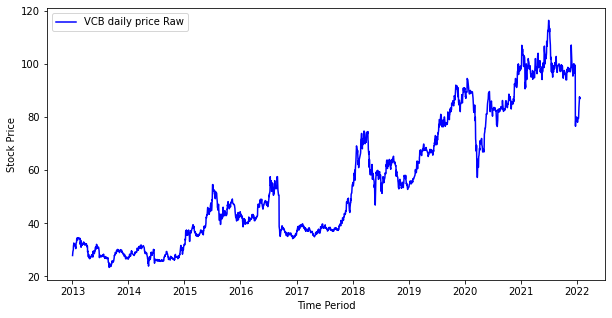

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.plot(data.date, data.close, color='blue', label='VCB daily price Raw')
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [ ]:
# import necesary libraries and modules
from bigdl.orca import init_orca_context, stop_orca_context
from bigdl.orca import OrcaContext

In [ ]:
# recommended to set it to True when running bigdl-chronos in Jupyter notebook 
OrcaContext.log_output = True # (this will display terminal's stdout and stderr in the Jupyter notebook).

init_orca_context(cluster_mode="local", cores=4, init_ray_on_spark=True)

Initializing orca context
Current pyspark location is : /usr/local/lib/python3.7/dist-packages/pyspark/__init__.py
Start to getOrCreate SparkContext
pyspark_submit_args is:  --driver-class-path /usr/local/lib/python3.7/dist-packages/bigdl/share/dllib/lib/bigdl-dllib-spark_2.4.6-0.14.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/orca/lib/bigdl-orca-spark_2.4.6-0.14.0-SNAPSHOT-jar-with-dependencies.jar pyspark-shell 
2022-01-29 14:20:38 WARN  NativeCodeLoader:62 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


2022-01-29 14:20:41,422 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-01-29 14:20:41,428 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-01-29 14:20:41,431 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-01-29 14:20:41,433 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
22-01-29 14:20:41 [Thread-3] INFO  Engine$:121 - Auto detect executor number and executor cores number
22-01-29 14:20:41 [Thread-3] INFO  Engine$:123 - Executor number is 1 and executor cores number is 4



User settings:

   KMP_AFFINITY=granularity=fine,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   OMP_NUM_THREADS=1

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_HAND_THREAD=false
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_FORKJOIN_FRAMES=true
   KMP_FORKJOIN_FRAMES_MODE=3
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_ITT_PREPARE_DELAY=0
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_MWAIT_HINTS=0
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_

22-01-29 14:20:42 [Thread-3] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 16
2022-01-29 14:20:42 WARN  SparkContext:66 - Using an existing SparkContext; some configuration may not take effect.
22-01-29 14:20:42 [Thread-3] INFO  Engine$:446 - Find existing spark context. Checking the spark conf...
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.Sample
BigDLBasePickler registering: bigdl.dllib.utils.common  Sample
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.EvaluatedResult
BigDLBasePickler registering: bigdl.dllib.utils.common  EvaluatedResult
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.JTensor
BigDLBasePickler registering: bigdl.dllib.utils.common  JTensor
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.JActivity
BigDLBasePickler registering: bigdl.dllib.utils.common  JActivity
Successfully got a SparkContext


2022-01-29 14:20:46,177	INFO services.py:1340 -- View the Ray dashboard at http://172.28.0.2:8265


{'node_ip_address': '172.28.0.2', 'raylet_ip_address': '172.28.0.2', 'redis_address': '172.28.0.2:6379', 'object_store_address': '/tmp/ray/session_2022-01-29_14-20-42_864560_549/sockets/plasma_store', 'raylet_socket_name': '/tmp/ray/session_2022-01-29_14-20-42_864560_549/sockets/raylet', 'webui_url': '172.28.0.2:8265', 'session_dir': '/tmp/ray/session_2022-01-29_14-20-42_864560_549', 'metrics_export_port': 47540, 'node_id': '9013fd704f90abbde2b39495d7c61e522d4590736030734211f10afc'}


<SparkContext master=local[4] appName=pyspark-shell>

## Data Pre-processing

In [ ]:
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import MinMaxScaler

df = data[['date', 'close']]
tsdata_train, tsdata_val, tsdata_test = TSDataset.from_pandas(df, dt_col="date", target_col="close", with_split=True, val_ratio = 0.1, test_ratio=0.1)
minmax_scaler = MinMaxScaler()

for tsdata in [tsdata_train, tsdata_val, tsdata_test]:
    tsdata.scale(minmax_scaler, fit=(tsdata is tsdata_train))\
#           .roll(lookback=50, horizon=1)

# X_train, y_train = tsdata_train.to_numpy()
# X_test, y_test = tsdata_test.to_numpy()
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Model LSTM

In [ ]:
import torch
from torch import nn
class LSTMNet(nn.Module):
    def __init__(self, input_dim, layer_num, hidden_dim, dropout, output_dim):
        super(LSTMNet, self).__init__()
        self.layer_num = layer_num
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_num, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, input_seq):
        h0 = torch.randn(self.layer_num, input_seq.size(0), self.hidden_dim)
        c0 = torch.randn(self.layer_num, input_seq.size(0), self.hidden_dim)
        
        _, (lstm_out, _) = self.lstm(input_seq, (h0, c0))
        y_pred = self.fc(lstm_out[-1].view(input_seq.shape[0], -1))
        y_pred = y_pred.unsqueeze(1)
        return y_pred

In [ ]:
def model_creator(config):
    return LSTMNet(input_dim=1,
                  layer_num=config['layer_num'],
                  hidden_dim=config['hidden_dim'],
                  dropout=config['dropout'],
                  output_dim=1)

In [ ]:
from bigdl.orca.automl import hp
search_space={
    'hidden_dim': hp.grid_search([32, 64]),
    'layer_num': hp.grid_search([2, 4]),
    'dropout': hp.uniform(0.1, 0.2)
}

In [ ]:
from bigdl.chronos.autots.autotsestimator import AutoTSEstimator
autotsest = AutoTSEstimator(model=model_creator,
                            search_space=search_space,
                            past_seq_len=50,
                            metric='mse',
                            loss=torch.nn.MSELoss(),
                            cpus_per_trial=2)

In [ ]:
ts_pipeline = autotsest.fit(data=tsdata_train,
                            epochs=50,
                            batch_size=hp.choice([16]),
                            validation_data=tsdata_val)

2022-01-29 14:20:53,790	WARNING function_runner.py:562 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2
train_func_aaebe_00001,PENDING,,16,0.117269,64,2
train_func_aaebe_00002,PENDING,,16,0.119688,32,4
train_func_aaebe_00003,PENDING,,16,0.151067,64,4


(ImplicitFunc pid=846) /usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
(ImplicitFunc pid=846)   import pandas.util.testing as tm


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2
train_func_aaebe_00002,PENDING,,16,0.119688,32,4
train_func_aaebe_00003,PENDING,,16,0.151067,64,4


(ImplicitFunc pid=847) /usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
(ImplicitFunc pid=847)   import pandas.util.testing as tm


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2
train_func_aaebe_00002,PENDING,,16,0.119688,32,4
train_func_aaebe_00003,PENDING,,16,0.151067,64,4


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2
train_func_aaebe_00002,PENDING,,16,0.119688,32,4
train_func_aaebe_00003,PENDING,,16,0.151067,64,4


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2
train_func_aaebe_00002,PENDING,,16,0.119688,32,4
train_func_aaebe_00003,PENDING,,16,0.151067,64,4


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2
train_func_aaebe_00002,PENDING,,16,0.119688,32,4
train_func_aaebe_00003,PENDING,,16,0.151067,64,4


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2
train_func_aaebe_00002,PENDING,,16,0.119688,32,4
train_func_aaebe_00003,PENDING,,16,0.151067,64,4


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,1,30.3249,0.00490425,0.00490425
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,,,,
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,1,30.3249,0.00490425,0.00490425
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,,,,
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,1,30.3249,0.00490425,0.00490425
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,,,,
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,1,30.3249,0.00490425,0.00490425
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,,,,
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,1,30.3249,0.00490425,0.00490425
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,,,,
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,2,53.7368,0.00490425,0.00773603
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,1,47.9843,0.00261671,0.00261671
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,2,53.7368,0.00490425,0.00773603
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,1,47.9843,0.00261671,0.00261671
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,3,67.7422,0.00490425,0.00543137
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,1,47.9843,0.00261671,0.00261671
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,3,67.7422,0.00490425,0.00543137
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,1,47.9843,0.00261671,0.00261671
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,3,67.7422,0.00490425,0.00543137
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,1,47.9843,0.00261671,0.00261671
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,3,67.7422,0.00490425,0.00543137
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,1,47.9843,0.00261671,0.00261671
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,4,89.1489,0.00315257,0.00315257
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,2,80.2368,0.00261671,0.00448714
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,4,89.1489,0.00315257,0.00315257
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,2,80.2368,0.00261671,0.00448714
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,4,89.1489,0.00315257,0.00315257
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,2,80.2368,0.00261671,0.00448714
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,4,89.1489,0.00315257,0.00315257
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,2,80.2368,0.00261671,0.00448714
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,4,89.1489,0.00315257,0.00315257
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,2,80.2368,0.00261671,0.00448714
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,4,89.1489,0.00315257,0.00315257
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,2,80.2368,0.00261671,0.00448714
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,4,89.1489,0.00315257,0.00315257
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,2,80.2368,0.00261671,0.00448714
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,5,125.282,0.00311619,0.00311619
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,2,80.2368,0.00261671,0.00448714
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,5,125.282,0.00311619,0.00311619
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,2,80.2368,0.00261671,0.00448714
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,5,125.282,0.00311619,0.00311619
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,2,80.2368,0.00261671,0.00448714
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,5,125.282,0.00311619,0.00311619
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,3,129.781,0.00167099,0.00167099
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,6,145.824,0.00311619,0.00589144
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,3,129.781,0.00167099,0.00167099
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,6,145.824,0.00311619,0.00589144
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,3,129.781,0.00167099,0.00167099
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,6,145.824,0.00311619,0.00589144
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,3,129.781,0.00167099,0.00167099
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,7,161.452,0.00311619,0.00350427
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,3,129.781,0.00167099,0.00167099
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,7,161.452,0.00311619,0.00350427
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,3,129.781,0.00167099,0.00167099
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,7,161.452,0.00311619,0.00350427
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,4,162.826,0.00167099,0.00200583
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,7,161.452,0.00311619,0.00350427
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,4,162.826,0.00167099,0.00200583
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,8,182.884,0.00311619,0.00334816
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,4,162.826,0.00167099,0.00200583
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,8,182.884,0.00311619,0.00334816
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,4,162.826,0.00167099,0.00200583
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,9,194.966,0.00141136,0.00141136
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,4,162.826,0.00167099,0.00200583
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,9,194.966,0.00141136,0.00141136
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,5,189.847,0.00167099,0.00213023
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,9,194.966,0.00141136,0.00141136
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,5,189.847,0.00167099,0.00213023
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,10,209.276,0.00133787,0.00133787
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,5,189.847,0.00167099,0.00213023
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,10,209.276,0.00133787,0.00133787
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,5,189.847,0.00167099,0.00213023
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,10,209.276,0.00133787,0.00133787
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,5,189.847,0.00167099,0.00213023
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,10,209.276,0.00133787,0.00133787
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,5,189.847,0.00167099,0.00213023
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,11,230.037,0.00133787,0.00253614
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,6,219.461,0.00167099,0.00207155
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,11,230.037,0.00133787,0.00253614
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,6,219.461,0.00167099,0.00207155
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,11,230.037,0.00133787,0.00253614
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,6,219.461,0.00167099,0.00207155
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,11,230.037,0.00133787,0.00253614
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,6,219.461,0.00167099,0.00207155
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,11,230.037,0.00133787,0.00253614
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,6,219.461,0.00167099,0.00207155
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,11,230.037,0.00133787,0.00253614
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,6,219.461,0.00167099,0.00207155
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,12,259.863,0.00133787,0.00240796
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,6,219.461,0.00167099,0.00207155
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,12,259.863,0.00133787,0.00240796
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,6,219.461,0.00167099,0.00207155
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,12,259.863,0.00133787,0.00240796
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,6,219.461,0.00167099,0.00207155
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,12,259.863,0.00133787,0.00240796
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,6,219.461,0.00167099,0.00207155
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,13,283.195,0.00117296,0.00117296
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,7,271.874,0.00167099,0.00360788
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,13,283.195,0.00117296,0.00117296
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,7,271.874,0.00167099,0.00360788
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,13,283.195,0.00117296,0.00117296
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,7,271.874,0.00167099,0.00360788
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,14,298.008,0.00117296,0.0021959
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,7,271.874,0.00167099,0.00360788
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,14,298.008,0.00117296,0.0021959
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,8,295.868,0.00167099,0.00167848
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,14,298.008,0.00117296,0.0021959
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,8,295.868,0.00167099,0.00167848
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,15,311.645,0.00117296,0.00277965
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,8,295.868,0.00167099,0.00167848
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,15,311.645,0.00117296,0.00277965
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,8,295.868,0.00167099,0.00167848
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,15,311.645,0.00117296,0.00277965
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,8,295.868,0.00167099,0.00167848
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,16,330.356,0.00116389,0.00116389
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,8,295.868,0.00167099,0.00167848
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,16,330.356,0.00116389,0.00116389
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,9,324.621,0.00167099,0.00432183
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,16,330.356,0.00116389,0.00116389
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,9,324.621,0.00167099,0.00432183
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,16,330.356,0.00116389,0.00116389
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,9,324.621,0.00167099,0.00432183
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,16,330.356,0.00116389,0.00116389
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,9,324.621,0.00167099,0.00432183
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,17,354.378,0.00116389,0.00117435
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,9,324.621,0.00167099,0.00432183
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,17,354.378,0.00116389,0.00117435
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,9,324.621,0.00167099,0.00432183
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,17,354.378,0.00116389,0.00117435
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,9,324.621,0.00167099,0.00432183
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,17,354.378,0.00116389,0.00117435
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,10,364.076,0.00166554,0.00166554
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,18,373.165,0.00116389,0.00186032
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,10,364.076,0.00166554,0.00166554
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,18,373.165,0.00116389,0.00186032
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,10,364.076,0.00166554,0.00166554
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,18,373.165,0.00116389,0.00186032
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,10,364.076,0.00166554,0.00166554
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,19,389.539,0.0010682,0.0010682
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,10,364.076,0.00166554,0.00166554
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,19,389.539,0.0010682,0.0010682
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,11,389.494,0.00109603,0.00109603
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,20,401.767,0.0010682,0.00172826
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,11,389.494,0.00109603,0.00109603
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,20,401.767,0.0010682,0.00172826
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,11,389.494,0.00109603,0.00109603
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,20,401.767,0.0010682,0.00172826
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,11,389.494,0.00109603,0.00109603
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,21,415.801,0.0010682,0.00116531
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,11,389.494,0.00109603,0.00109603
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,21,415.801,0.0010682,0.00116531
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,11,389.494,0.00109603,0.00109603
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,21,415.801,0.0010682,0.00116531
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,12,421.371,0.00109603,0.00118942
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,21,415.801,0.0010682,0.00116531
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,12,421.371,0.00109603,0.00118942
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,21,415.801,0.0010682,0.00116531
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,12,421.371,0.00109603,0.00118942
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,22,442.113,0.0010682,0.00107555
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,12,421.371,0.00109603,0.00118942
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,22,442.113,0.0010682,0.00107555
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,12,421.371,0.00109603,0.00118942
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,22,442.113,0.0010682,0.00107555
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,12,421.371,0.00109603,0.00118942
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,23,460.474,0.000994419,0.000994419
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,12,421.371,0.00109603,0.00118942
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,23,460.474,0.000994419,0.000994419
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,13,455.947,0.00109603,0.00135529
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,23,460.474,0.000994419,0.000994419
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,13,455.947,0.00109603,0.00135529
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,24,475.958,0.000994419,0.00102145
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,13,455.947,0.00109603,0.00135529
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,24,475.958,0.000994419,0.00102145
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,13,455.947,0.00109603,0.00135529
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,24,475.958,0.000994419,0.00102145
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,13,455.947,0.00109603,0.00135529
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,24,475.958,0.000994419,0.00102145
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,13,455.947,0.00109603,0.00135529
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,24,475.958,0.000994419,0.00102145
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,13,455.947,0.00109603,0.00135529
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,24,475.958,0.000994419,0.00102145
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,13,455.947,0.00109603,0.00135529
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,25,507.43,0.000994419,0.00108458
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,14,498.629,0.00108453,0.00108453
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,25,507.43,0.000994419,0.00108458
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,14,498.629,0.00108453,0.00108453
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,25,507.43,0.000994419,0.00108458
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,14,498.629,0.00108453,0.00108453
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,25,507.43,0.000994419,0.00108458
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,14,498.629,0.00108453,0.00108453
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,25,507.43,0.000994419,0.00108458
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,14,498.629,0.00108453,0.00108453
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,26,531.811,0.000967948,0.000967948
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,14,498.629,0.00108453,0.00108453
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,26,531.811,0.000967948,0.000967948
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,14,498.629,0.00108453,0.00108453
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,26,531.811,0.000967948,0.000967948
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,15,533.509,0.000903639,0.000903639
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,27,547.981,0.000967948,0.000988541
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,15,533.509,0.000903639,0.000903639
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,27,547.981,0.000967948,0.000988541
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,15,533.509,0.000903639,0.000903639
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,27,547.981,0.000967948,0.000988541
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,15,533.509,0.000903639,0.000903639
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,27,547.981,0.000967948,0.000988541
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,15,533.509,0.000903639,0.000903639
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,27,547.981,0.000967948,0.000988541
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,15,533.509,0.000903639,0.000903639
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,28,574.861,0.00093239,0.00093239
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,15,533.509,0.000903639,0.000903639
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,28,574.861,0.00093239,0.00093239
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,15,533.509,0.000903639,0.000903639
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,28,574.861,0.00093239,0.00093239
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,16,573.994,0.000903639,0.00175063
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,29,590.52,0.00093239,0.00124049
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,16,573.994,0.000903639,0.00175063
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,29,590.52,0.00093239,0.00124049
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,16,573.994,0.000903639,0.00175063
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,29,590.52,0.00093239,0.00124049
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,16,573.994,0.000903639,0.00175063
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,30,604.205,0.00092342,0.00092342
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,17,596.456,0.000875297,0.000875297
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,30,604.205,0.00092342,0.00092342
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,17,596.456,0.000875297,0.000875297
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,30,604.205,0.00092342,0.00092342
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,17,596.456,0.000875297,0.000875297
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,30,604.205,0.00092342,0.00092342
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,17,596.456,0.000875297,0.000875297
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,31,625.343,0.00092342,0.00121796
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,17,596.456,0.000875297,0.000875297
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,31,625.343,0.00092342,0.00121796
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,17,596.456,0.000875297,0.000875297
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,31,625.343,0.00092342,0.00121796
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,17,596.456,0.000875297,0.000875297
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,31,625.343,0.00092342,0.00121796
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,17,596.456,0.000875297,0.000875297
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,32,647.64,0.00088668,0.00088668
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,18,637.439,0.000875297,0.000957414
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,32,647.64,0.00088668,0.00088668
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,18,637.439,0.000875297,0.000957414
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,32,647.64,0.00088668,0.00088668
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,18,637.439,0.000875297,0.000957414
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,33,660.979,0.00088668,0.000931843
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,18,637.439,0.000875297,0.000957414
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,33,660.979,0.00088668,0.000931843
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,18,637.439,0.000875297,0.000957414
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,33,660.979,0.00088668,0.000931843
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,19,664.258,0.000875297,0.00121074
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,33,660.979,0.00088668,0.000931843
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,19,664.258,0.000875297,0.00121074
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,34,680.804,0.00088668,0.00174273
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,19,664.258,0.000875297,0.00121074
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,34,680.804,0.00088668,0.00174273
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,19,664.258,0.000875297,0.00121074
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,34,680.804,0.00088668,0.00174273
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,19,664.258,0.000875297,0.00121074
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,35,699.549,0.000846329,0.000846329
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,19,664.258,0.000875297,0.00121074
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,35,699.549,0.000846329,0.000846329
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,20,695.673,0.000875297,0.00100391
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,35,699.549,0.000846329,0.000846329
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,20,695.673,0.000875297,0.00100391
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,35,699.549,0.000846329,0.000846329
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,20,695.673,0.000875297,0.00100391
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,36,719.61,0.000846329,0.00112167
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,20,695.673,0.000875297,0.00100391
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,36,719.61,0.000846329,0.00112167
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,20,695.673,0.000875297,0.00100391
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,36,719.61,0.000846329,0.00112167
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,20,695.673,0.000875297,0.00100391
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,37,734.534,0.000846329,0.000848936
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,21,727.827,0.000875297,0.00127886
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,37,734.534,0.000846329,0.000848936
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,21,727.827,0.000875297,0.00127886
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,37,734.534,0.000846329,0.000848936
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,21,727.827,0.000875297,0.00127886
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,38,747.106,0.000846329,0.00149282
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,21,727.827,0.000875297,0.00127886
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,38,747.106,0.000846329,0.00149282
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,21,727.827,0.000875297,0.00127886
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,39,760.337,0.000846329,0.000905891
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,22,750.303,0.000875297,0.000875597
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,39,760.337,0.000846329,0.000905891
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,22,750.303,0.000875297,0.000875597
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,39,760.337,0.000846329,0.000905891
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,22,750.303,0.000875297,0.000875597
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,40,774.889,0.000846329,0.00148116
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,22,750.303,0.000875297,0.000875597
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,40,774.889,0.000846329,0.00148116
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,23,774.711,0.000875297,0.00163434
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,40,774.889,0.000846329,0.00148116
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,23,774.711,0.000875297,0.00163434
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,41,790.862,0.000846329,0.00185565
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,23,774.711,0.000875297,0.00163434
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,41,790.862,0.000846329,0.00185565
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,23,774.711,0.000875297,0.00163434
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,41,790.862,0.000846329,0.00185565
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,23,774.711,0.000875297,0.00163434
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,42,805.439,0.000846329,0.000849847
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,23,774.711,0.000875297,0.00163434
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,42,805.439,0.000846329,0.000849847
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,24,803.424,0.000875297,0.00154696
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,42,805.439,0.000846329,0.000849847
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,24,803.424,0.000875297,0.00154696
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,43,823.77,0.000846329,0.00188523
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,24,803.424,0.000875297,0.00154696
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,43,823.77,0.000846329,0.00188523
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,24,803.424,0.000875297,0.00154696
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,43,823.77,0.000846329,0.00188523
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,24,803.424,0.000875297,0.00154696
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,44,838.821,0.000846329,0.000895157
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,25,832.372,0.000729244,0.000729244
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,44,838.821,0.000846329,0.000895157
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,25,832.372,0.000729244,0.000729244
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,44,838.821,0.000846329,0.000895157
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,25,832.372,0.000729244,0.000729244
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,44,838.821,0.000846329,0.000895157
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,25,832.372,0.000729244,0.000729244
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,45,855.622,0.000846329,0.00199621
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,25,832.372,0.000729244,0.000729244
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,45,855.622,0.000846329,0.00199621
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,25,832.372,0.000729244,0.000729244
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,46,869.642,0.000846329,0.00109707
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,26,859.952,0.000729244,0.000776277
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,46,869.642,0.000846329,0.00109707
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,26,859.952,0.000729244,0.000776277
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,46,869.642,0.000846329,0.00109707
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,26,859.952,0.000729244,0.000776277
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,46,869.642,0.000846329,0.00109707
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,26,859.952,0.000729244,0.000776277
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,46,869.642,0.000846329,0.00109707
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,26,859.952,0.000729244,0.000776277
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,47,895.784,0.000695359,0.000695359
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,26,859.952,0.000729244,0.000776277
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,47,895.784,0.000695359,0.000695359
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,26,859.952,0.000729244,0.000776277
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,47,895.784,0.000695359,0.000695359
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,27,899.643,0.000729244,0.00142032
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,48,912.657,0.000695359,0.000735031
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,27,899.643,0.000729244,0.00142032
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,48,912.657,0.000695359,0.000735031
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,27,899.643,0.000729244,0.00142032
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,48,912.657,0.000695359,0.000735031
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,27,899.643,0.000729244,0.00142032
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,49,929.322,0.000695359,0.000823964
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,27,899.643,0.000729244,0.00142032
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,49,929.322,0.000695359,0.000823964
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,28,927.093,0.000729244,0.000784911
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,RUNNING,172.28.0.2:846,16,0.188722,32,2,49,929.322,0.000695359,0.000823964
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,28,927.093,0.000729244,0.000784911
train_func_aaebe_00002,PENDING,,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,28,927.093,0.000729244,0.000784911
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,28,927.093,0.000729244,0.000784911
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,28,927.093,0.000729244,0.000784911
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,29,952.639,0.000729244,0.000746566
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,29,952.639,0.000729244,0.000746566
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,29,952.639,0.000729244,0.000746566
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,29,952.639,0.000729244,0.000746566
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,,,,
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,29,952.639,0.000729244,0.000746566
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,1,34.1154,0.011418,0.011418
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,29,952.639,0.000729244,0.000746566
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,1,34.1154,0.011418,0.011418
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,30,981.13,0.000690547,0.000690547
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,1,34.1154,0.011418,0.011418
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,30,981.13,0.000690547,0.000690547
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,1,34.1154,0.011418,0.011418
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,30,981.13,0.000690547,0.000690547
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,1,34.1154,0.011418,0.011418
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,30,981.13,0.000690547,0.000690547
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,2,63.4365,0.00411806,0.00411806
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,30,981.13,0.000690547,0.000690547
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,2,63.4365,0.00411806,0.00411806
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,30,981.13,0.000690547,0.000690547
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,2,63.4365,0.00411806,0.00411806
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,31,1014.23,0.000690547,0.000949152
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,2,63.4365,0.00411806,0.00411806
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,31,1014.23,0.000690547,0.000949152
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,2,63.4365,0.00411806,0.00411806
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,31,1014.23,0.000690547,0.000949152
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,2,63.4365,0.00411806,0.00411806
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,31,1014.23,0.000690547,0.000949152
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,2,63.4365,0.00411806,0.00411806
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,31,1014.23,0.000690547,0.000949152
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,2,63.4365,0.00411806,0.00411806
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,31,1014.23,0.000690547,0.000949152
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,3,103.429,0.00274873,0.00274873
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,31,1014.23,0.000690547,0.000949152
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,3,103.429,0.00274873,0.00274873
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,32,1049.5,0.000683401,0.000683401
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,3,103.429,0.00274873,0.00274873
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,32,1049.5,0.000683401,0.000683401
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,3,103.429,0.00274873,0.00274873
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,32,1049.5,0.000683401,0.000683401
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,3,103.429,0.00274873,0.00274873
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,32,1049.5,0.000683401,0.000683401
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,3,103.429,0.00274873,0.00274873
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,32,1049.5,0.000683401,0.000683401
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,3,103.429,0.00274873,0.00274873
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,32,1049.5,0.000683401,0.000683401
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,4,142.576,0.00218699,0.00218699
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,33,1084.27,0.000683401,0.000886539
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,4,142.576,0.00218699,0.00218699
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,33,1084.27,0.000683401,0.000886539
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,4,142.576,0.00218699,0.00218699
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,33,1084.27,0.000683401,0.000886539
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,4,142.576,0.00218699,0.00218699
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,33,1084.27,0.000683401,0.000886539
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,4,142.576,0.00218699,0.00218699
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,33,1084.27,0.000683401,0.000886539
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,4,142.576,0.00218699,0.00218699
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,34,1110.01,0.000599978,0.000599978
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,5,171.349,0.00218699,0.00315259
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,34,1110.01,0.000599978,0.000599978
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,5,171.349,0.00218699,0.00315259
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,34,1110.01,0.000599978,0.000599978
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,5,171.349,0.00218699,0.00315259
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,34,1110.01,0.000599978,0.000599978
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,5,171.349,0.00218699,0.00315259
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,34,1110.01,0.000599978,0.000599978
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,5,171.349,0.00218699,0.00315259
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,35,1135.03,0.000599978,0.00118501
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,6,198.682,0.00218699,0.00687818
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,35,1135.03,0.000599978,0.00118501
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,6,198.682,0.00218699,0.00687818
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,35,1135.03,0.000599978,0.00118501
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,6,198.682,0.00218699,0.00687818
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,35,1135.03,0.000599978,0.00118501
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,6,198.682,0.00218699,0.00687818
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,35,1135.03,0.000599978,0.00118501
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,6,198.682,0.00218699,0.00687818
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,35,1135.03,0.000599978,0.00118501
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,6,198.682,0.00218699,0.00687818
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,36,1164.69,0.000599978,0.00109349
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,6,198.682,0.00218699,0.00687818
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,36,1164.69,0.000599978,0.00109349
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,7,233.361,0.00197632,0.00197632
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,36,1164.69,0.000599978,0.00109349
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,7,233.361,0.00197632,0.00197632
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,36,1164.69,0.000599978,0.00109349
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,7,233.361,0.00197632,0.00197632
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,36,1164.69,0.000599978,0.00109349
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,7,233.361,0.00197632,0.00197632
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,37,1193.61,0.000582281,0.000582281
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,7,233.361,0.00197632,0.00197632
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,37,1193.61,0.000582281,0.000582281
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,7,233.361,0.00197632,0.00197632
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,37,1193.61,0.000582281,0.000582281
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,8,264.932,0.00197632,0.00216656
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,37,1193.61,0.000582281,0.000582281
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,8,264.932,0.00197632,0.00216656
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,37,1193.61,0.000582281,0.000582281
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,8,264.932,0.00197632,0.00216656
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,37,1193.61,0.000582281,0.000582281
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,8,264.932,0.00197632,0.00216656
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,38,1222.74,0.000582281,0.0011164
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,8,264.932,0.00197632,0.00216656
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,38,1222.74,0.000582281,0.0011164
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,8,264.932,0.00197632,0.00216656
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,38,1222.74,0.000582281,0.0011164
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,8,264.932,0.00197632,0.00216656
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,38,1222.74,0.000582281,0.0011164
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,9,301.046,0.00197632,0.00227507
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,38,1222.74,0.000582281,0.0011164
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,9,301.046,0.00197632,0.00227507
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,38,1222.74,0.000582281,0.0011164
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,9,301.046,0.00197632,0.00227507
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,39,1256.78,0.000539677,0.000539677
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,9,301.046,0.00197632,0.00227507
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,39,1256.78,0.000539677,0.000539677
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,9,301.046,0.00197632,0.00227507
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,39,1256.78,0.000539677,0.000539677
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,10,331.455,0.00197632,0.00908085
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,39,1256.78,0.000539677,0.000539677
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,10,331.455,0.00197632,0.00908085
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,39,1256.78,0.000539677,0.000539677
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,10,331.455,0.00197632,0.00908085
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,40,1279.66,0.000539677,0.00105977
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,10,331.455,0.00197632,0.00908085
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,40,1279.66,0.000539677,0.00105977
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,10,331.455,0.00197632,0.00908085
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,40,1279.66,0.000539677,0.00105977
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,11,355.563,0.00197632,0.00336559
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,40,1279.66,0.000539677,0.00105977
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,11,355.563,0.00197632,0.00336559
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,41,1302.78,0.000539677,0.000548107
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,11,355.563,0.00197632,0.00336559
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,41,1302.78,0.000539677,0.000548107
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,11,355.563,0.00197632,0.00336559
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,41,1302.78,0.000539677,0.000548107
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,11,355.563,0.00197632,0.00336559
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,41,1302.78,0.000539677,0.000548107
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,11,355.563,0.00197632,0.00336559
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,41,1302.78,0.000539677,0.000548107
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,12,388.373,0.00197632,0.00474425
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,41,1302.78,0.000539677,0.000548107
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,12,388.373,0.00197632,0.00474425
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,41,1302.78,0.000539677,0.000548107
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,12,388.373,0.00197632,0.00474425
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,42,1337.41,0.000539677,0.00207464
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,12,388.373,0.00197632,0.00474425
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,42,1337.41,0.000539677,0.00207464
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,12,388.373,0.00197632,0.00474425
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,42,1337.41,0.000539677,0.00207464
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,12,388.373,0.00197632,0.00474425
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,42,1337.41,0.000539677,0.00207464
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,13,419.423,0.00197632,0.00261952
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,43,1361.58,0.000539677,0.000542918
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,13,419.423,0.00197632,0.00261952
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,43,1361.58,0.000539677,0.000542918
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,13,419.423,0.00197632,0.00261952
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,43,1361.58,0.000539677,0.000542918
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,13,419.423,0.00197632,0.00261952
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,43,1361.58,0.000539677,0.000542918
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,13,419.423,0.00197632,0.00261952
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,43,1361.58,0.000539677,0.000542918
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,13,419.423,0.00197632,0.00261952
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,43,1361.58,0.000539677,0.000542918
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,14,450.184,0.0019351,0.0019351
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,44,1389.08,0.000539677,0.00184423
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,14,450.184,0.0019351,0.0019351
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,44,1389.08,0.000539677,0.00184423
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,14,450.184,0.0019351,0.0019351
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,44,1389.08,0.000539677,0.00184423
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,14,450.184,0.0019351,0.0019351
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,44,1389.08,0.000539677,0.00184423
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,14,450.184,0.0019351,0.0019351
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,44,1389.08,0.000539677,0.00184423
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,14,450.184,0.0019351,0.0019351
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,45,1415.76,0.000513631,0.000513631
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,15,479.65,0.0019351,0.00199875
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,45,1415.76,0.000513631,0.000513631
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,15,479.65,0.0019351,0.00199875
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,45,1415.76,0.000513631,0.000513631
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,15,479.65,0.0019351,0.00199875
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,45,1415.76,0.000513631,0.000513631
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,15,479.65,0.0019351,0.00199875
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,45,1415.76,0.000513631,0.000513631
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,15,479.65,0.0019351,0.00199875
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,46,1441.55,0.000513631,0.001003
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,15,479.65,0.0019351,0.00199875
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,46,1441.55,0.000513631,0.001003
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,16,507.915,0.0019351,0.00349861
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,46,1441.55,0.000513631,0.001003
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,16,507.915,0.0019351,0.00349861
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,46,1441.55,0.000513631,0.001003
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,16,507.915,0.0019351,0.00349861
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,46,1441.55,0.000513631,0.001003
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,16,507.915,0.0019351,0.00349861
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,46,1441.55,0.000513631,0.001003
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,16,507.915,0.0019351,0.00349861
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,47,1473.02,0.000513631,0.00232829
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,16,507.915,0.0019351,0.00349861
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,47,1473.02,0.000513631,0.00232829
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,17,541.716,0.0019351,0.00494076
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,47,1473.02,0.000513631,0.00232829
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,17,541.716,0.0019351,0.00494076
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,47,1473.02,0.000513631,0.00232829
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,17,541.716,0.0019351,0.00494076
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,47,1473.02,0.000513631,0.00232829
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,17,541.716,0.0019351,0.00494076
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,47,1473.02,0.000513631,0.00232829
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,17,541.716,0.0019351,0.00494076
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,48,1502.33,0.000513631,0.000529059
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,17,541.716,0.0019351,0.00494076
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,48,1502.33,0.000513631,0.000529059
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,17,541.716,0.0019351,0.00494076
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,48,1502.33,0.000513631,0.000529059
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,18,577.621,0.0019351,0.00241209
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,48,1502.33,0.000513631,0.000529059
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,18,577.621,0.0019351,0.00241209
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,48,1502.33,0.000513631,0.000529059
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,18,577.621,0.0019351,0.00241209
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,49,1528.67,0.000513631,0.000825874
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,18,577.621,0.0019351,0.00241209
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,49,1528.67,0.000513631,0.000825874
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,18,577.621,0.0019351,0.00241209
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,49,1528.67,0.000513631,0.000825874
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,18,577.621,0.0019351,0.00241209
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,49,1528.67,0.000513631,0.000825874
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,19,607.235,0.0019351,0.00279363
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00001,RUNNING,172.28.0.2:847,16,0.117269,64,2,49,1528.67,0.000513631,0.000825874
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,19,607.235,0.0019351,0.00279363
train_func_aaebe_00003,PENDING,,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,19,607.235,0.0019351,0.00279363
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,19,607.235,0.0019351,0.00279363
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,19,607.235,0.0019351,0.00279363
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,20,636.196,0.0019351,0.00212608
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,20,636.196,0.0019351,0.00212608
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,20,636.196,0.0019351,0.00212608
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,20,636.196,0.0019351,0.00212608
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,20,636.196,0.0019351,0.00212608
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,20,636.196,0.0019351,0.00212608
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,20,636.196,0.0019351,0.00212608
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,,,,
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,21,668.288,0.0019351,0.00257559
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,1,53.2294,0.00996486,0.00996486
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,21,668.288,0.0019351,0.00257559
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,1,53.2294,0.00996486,0.00996486
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,21,668.288,0.0019351,0.00257559
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,1,53.2294,0.00996486,0.00996486
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,21,668.288,0.0019351,0.00257559
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,1,53.2294,0.00996486,0.00996486
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,21,668.288,0.0019351,0.00257559
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,1,53.2294,0.00996486,0.00996486
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,22,697.768,0.0019351,0.0029817
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,1,53.2294,0.00996486,0.00996486
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,22,697.768,0.0019351,0.0029817
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,1,53.2294,0.00996486,0.00996486
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,22,697.768,0.0019351,0.0029817
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,1,53.2294,0.00996486,0.00996486
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,22,697.768,0.0019351,0.0029817
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,1,53.2294,0.00996486,0.00996486
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,22,697.768,0.0019351,0.0029817
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,1,53.2294,0.00996486,0.00996486
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,22,697.768,0.0019351,0.0029817
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,1,53.2294,0.00996486,0.00996486
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,22,697.768,0.0019351,0.0029817
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,1,53.2294,0.00996486,0.00996486
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,23,731.345,0.0019351,0.00217453
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,2,111.763,0.00506982,0.00506982
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,23,731.345,0.0019351,0.00217453
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,2,111.763,0.00506982,0.00506982
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,23,731.345,0.0019351,0.00217453
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,2,111.763,0.00506982,0.00506982
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,23,731.345,0.0019351,0.00217453
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,2,111.763,0.00506982,0.00506982
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,23,731.345,0.0019351,0.00217453
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,2,111.763,0.00506982,0.00506982
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,23,731.345,0.0019351,0.00217453
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,2,111.763,0.00506982,0.00506982
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,23,731.345,0.0019351,0.00217453
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,2,111.763,0.00506982,0.00506982
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,24,766.81,0.00175063,0.00175063
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,2,111.763,0.00506982,0.00506982
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,24,766.81,0.00175063,0.00175063
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,2,111.763,0.00506982,0.00506982
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,24,766.81,0.00175063,0.00175063
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,2,111.763,0.00506982,0.00506982
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,24,766.81,0.00175063,0.00175063
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,2,111.763,0.00506982,0.00506982
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,24,766.81,0.00175063,0.00175063
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,2,111.763,0.00506982,0.00506982
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,24,766.81,0.00175063,0.00175063
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,2,111.763,0.00506982,0.00506982
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,24,766.81,0.00175063,0.00175063
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,3,176.909,0.00219158,0.00219158
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,24,766.81,0.00175063,0.00175063
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,3,176.909,0.00219158,0.00219158
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,25,806.464,0.00175063,0.0018748
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,3,176.909,0.00219158,0.00219158
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,25,806.464,0.00175063,0.0018748
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,3,176.909,0.00219158,0.00219158
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,25,806.464,0.00175063,0.0018748
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,3,176.909,0.00219158,0.00219158
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,25,806.464,0.00175063,0.0018748
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,3,176.909,0.00219158,0.00219158
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,25,806.464,0.00175063,0.0018748
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,3,176.909,0.00219158,0.00219158
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,25,806.464,0.00175063,0.0018748
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,3,176.909,0.00219158,0.00219158
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,25,806.464,0.00175063,0.0018748
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,3,176.909,0.00219158,0.00219158
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,25,806.464,0.00175063,0.0018748
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,3,176.909,0.00219158,0.00219158
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,25,806.464,0.00175063,0.0018748
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,3,176.909,0.00219158,0.00219158
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,26,855.606,0.00175063,0.00333034
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,3,176.909,0.00219158,0.00219158
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,26,855.606,0.00175063,0.00333034
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,3,176.909,0.00219158,0.00219158
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,26,855.606,0.00175063,0.00333034
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,3,176.909,0.00219158,0.00219158
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,26,855.606,0.00175063,0.00333034
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,3,176.909,0.00219158,0.00219158
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,26,855.606,0.00175063,0.00333034
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,3,176.909,0.00219158,0.00219158
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,26,855.606,0.00175063,0.00333034
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,4,261.662,0.00202381,0.00202381
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,26,855.606,0.00175063,0.00333034
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,4,261.662,0.00202381,0.00202381
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,27,893.301,0.00175063,0.00328021
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,4,261.662,0.00202381,0.00202381
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,27,893.301,0.00175063,0.00328021
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,4,261.662,0.00202381,0.00202381
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,27,893.301,0.00175063,0.00328021
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,4,261.662,0.00202381,0.00202381
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,27,893.301,0.00175063,0.00328021
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,4,261.662,0.00202381,0.00202381
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,27,893.301,0.00175063,0.00328021
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,4,261.662,0.00202381,0.00202381
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,27,893.301,0.00175063,0.00328021
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,4,261.662,0.00202381,0.00202381
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,27,893.301,0.00175063,0.00328021
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,4,261.662,0.00202381,0.00202381
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,28,926.715,0.00175063,0.00213079
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,4,261.662,0.00202381,0.00202381
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,28,926.715,0.00175063,0.00213079
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,4,261.662,0.00202381,0.00202381
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,28,926.715,0.00175063,0.00213079
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,5,316.211,0.00169471,0.00169471
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,28,926.715,0.00175063,0.00213079
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,5,316.211,0.00169471,0.00169471
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,28,926.715,0.00175063,0.00213079
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,5,316.211,0.00169471,0.00169471
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,29,954.274,0.00175063,0.00459324
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,5,316.211,0.00169471,0.00169471
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,29,954.274,0.00175063,0.00459324
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,5,316.211,0.00169471,0.00169471
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,29,954.274,0.00175063,0.00459324
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,5,316.211,0.00169471,0.00169471
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,29,954.274,0.00175063,0.00459324
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,5,316.211,0.00169471,0.00169471
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,29,954.274,0.00175063,0.00459324
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,5,316.211,0.00169471,0.00169471
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,29,954.274,0.00175063,0.00459324
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,5,316.211,0.00169471,0.00169471
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,30,982.473,0.00175063,0.00190699
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,5,316.211,0.00169471,0.00169471
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,30,982.473,0.00175063,0.00190699
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,5,316.211,0.00169471,0.00169471
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,30,982.473,0.00175063,0.00190699
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,6,370.973,0.00150789,0.00150789
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,30,982.473,0.00175063,0.00190699
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,6,370.973,0.00150789,0.00150789
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,30,982.473,0.00175063,0.00190699
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,6,370.973,0.00150789,0.00150789
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,30,982.473,0.00175063,0.00190699
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,6,370.973,0.00150789,0.00150789
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,30,982.473,0.00175063,0.00190699
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,6,370.973,0.00150789,0.00150789
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,30,982.473,0.00175063,0.00190699
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,6,370.973,0.00150789,0.00150789
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,30,982.473,0.00175063,0.00190699
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,6,370.973,0.00150789,0.00150789
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,31,1025.96,0.00175063,0.00387123
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,6,370.973,0.00150789,0.00150789
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,31,1025.96,0.00175063,0.00387123
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,6,370.973,0.00150789,0.00150789
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,31,1025.96,0.00175063,0.00387123
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,6,370.973,0.00150789,0.00150789
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,31,1025.96,0.00175063,0.00387123
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,6,370.973,0.00150789,0.00150789
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,31,1025.96,0.00175063,0.00387123
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,6,370.973,0.00150789,0.00150789
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,31,1025.96,0.00175063,0.00387123
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,6,370.973,0.00150789,0.00150789
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,31,1025.96,0.00175063,0.00387123
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,7,440.039,0.00150789,0.00215983
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,32,1062.04,0.00175063,0.00421774
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,7,440.039,0.00150789,0.00215983
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,32,1062.04,0.00175063,0.00421774
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,7,440.039,0.00150789,0.00215983
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,32,1062.04,0.00175063,0.00421774
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,7,440.039,0.00150789,0.00215983
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,32,1062.04,0.00175063,0.00421774
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,7,440.039,0.00150789,0.00215983
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,32,1062.04,0.00175063,0.00421774
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,7,440.039,0.00150789,0.00215983
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,32,1062.04,0.00175063,0.00421774
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,7,440.039,0.00150789,0.00215983
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,32,1062.04,0.00175063,0.00421774
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,7,440.039,0.00150789,0.00215983
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,32,1062.04,0.00175063,0.00421774
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,7,440.039,0.00150789,0.00215983
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,32,1062.04,0.00175063,0.00421774
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,7,440.039,0.00150789,0.00215983
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,33,1107.6,0.00175063,0.00314839
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,7,440.039,0.00150789,0.00215983
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,33,1107.6,0.00175063,0.00314839
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,7,440.039,0.00150789,0.00215983
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,33,1107.6,0.00175063,0.00314839
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,7,440.039,0.00150789,0.00215983
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,33,1107.6,0.00175063,0.00314839
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,7,440.039,0.00150789,0.00215983
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,33,1107.6,0.00175063,0.00314839
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,8,509.651,0.00150789,0.00327853
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,34,1137.07,0.00175063,0.00272776
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,8,509.651,0.00150789,0.00327853
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,34,1137.07,0.00175063,0.00272776
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,8,509.651,0.00150789,0.00327853
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,34,1137.07,0.00175063,0.00272776
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,8,509.651,0.00150789,0.00327853
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,34,1137.07,0.00175063,0.00272776
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,8,509.651,0.00150789,0.00327853
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,34,1137.07,0.00175063,0.00272776
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,8,509.651,0.00150789,0.00327853
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,34,1137.07,0.00175063,0.00272776
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,8,509.651,0.00150789,0.00327853
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,34,1137.07,0.00175063,0.00272776
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,8,509.651,0.00150789,0.00327853
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,34,1137.07,0.00175063,0.00272776
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,8,509.651,0.00150789,0.00327853
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,35,1175.67,0.00175063,0.00208576
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,8,509.651,0.00150789,0.00327853
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,35,1175.67,0.00175063,0.00208576
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,8,509.651,0.00150789,0.00327853
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,35,1175.67,0.00175063,0.00208576
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,9,565.839,0.00150789,0.00924047
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,35,1175.67,0.00175063,0.00208576
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,9,565.839,0.00150789,0.00924047
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,35,1175.67,0.00175063,0.00208576
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,9,565.839,0.00150789,0.00924047
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,35,1175.67,0.00175063,0.00208576
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,9,565.839,0.00150789,0.00924047
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,35,1175.67,0.00175063,0.00208576
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,9,565.839,0.00150789,0.00924047
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,36,1209.84,0.00175063,0.00612237
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,9,565.839,0.00150789,0.00924047
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,36,1209.84,0.00175063,0.00612237
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,9,565.839,0.00150789,0.00924047
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,36,1209.84,0.00175063,0.00612237
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,9,565.839,0.00150789,0.00924047
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,36,1209.84,0.00175063,0.00612237
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,9,565.839,0.00150789,0.00924047
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,36,1209.84,0.00175063,0.00612237
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,9,565.839,0.00150789,0.00924047
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,36,1209.84,0.00175063,0.00612237
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,9,565.839,0.00150789,0.00924047
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,36,1209.84,0.00175063,0.00612237
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,9,565.839,0.00150789,0.00924047
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,37,1246.4,0.00175063,0.00243747
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,9,565.839,0.00150789,0.00924047
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,37,1246.4,0.00175063,0.00243747
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,10,635.155,0.00150789,0.00728106
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,37,1246.4,0.00175063,0.00243747
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,10,635.155,0.00150789,0.00728106
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,37,1246.4,0.00175063,0.00243747
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,10,635.155,0.00150789,0.00728106
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,37,1246.4,0.00175063,0.00243747
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,10,635.155,0.00150789,0.00728106
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,37,1246.4,0.00175063,0.00243747
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,10,635.155,0.00150789,0.00728106
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,38,1278.88,0.00175063,0.00303647
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,10,635.155,0.00150789,0.00728106
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,38,1278.88,0.00175063,0.00303647
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,10,635.155,0.00150789,0.00728106
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,38,1278.88,0.00175063,0.00303647
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,10,635.155,0.00150789,0.00728106
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,38,1278.88,0.00175063,0.00303647
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,10,635.155,0.00150789,0.00728106
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,38,1278.88,0.00175063,0.00303647
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,10,635.155,0.00150789,0.00728106
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,38,1278.88,0.00175063,0.00303647
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,11,686.77,0.00150789,0.0107998
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,39,1307.73,0.00175063,0.00300404
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,11,686.77,0.00150789,0.0107998
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,39,1307.73,0.00175063,0.00300404
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,11,686.77,0.00150789,0.0107998
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,39,1307.73,0.00175063,0.00300404
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,11,686.77,0.00150789,0.0107998
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,39,1307.73,0.00175063,0.00300404
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,11,686.77,0.00150789,0.0107998
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,39,1307.73,0.00175063,0.00300404
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,11,686.77,0.00150789,0.0107998
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,39,1307.73,0.00175063,0.00300404
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,11,686.77,0.00150789,0.0107998
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,40,1339.88,0.00175063,0.00226095
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,11,686.77,0.00150789,0.0107998
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,40,1339.88,0.00175063,0.00226095
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,11,686.77,0.00150789,0.0107998
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,40,1339.88,0.00175063,0.00226095
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,11,686.77,0.00150789,0.0107998
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,40,1339.88,0.00175063,0.00226095
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,11,686.77,0.00150789,0.0107998
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,40,1339.88,0.00175063,0.00226095
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,12,741.828,0.00150789,0.00173363
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,40,1339.88,0.00175063,0.00226095
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,12,741.828,0.00150789,0.00173363
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,41,1371.9,0.00175063,0.00411206
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,12,741.828,0.00150789,0.00173363
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,41,1371.9,0.00175063,0.00411206
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,12,741.828,0.00150789,0.00173363
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,41,1371.9,0.00175063,0.00411206
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,12,741.828,0.00150789,0.00173363
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,41,1371.9,0.00175063,0.00411206
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,12,741.828,0.00150789,0.00173363
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,41,1371.9,0.00175063,0.00411206
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,12,741.828,0.00150789,0.00173363
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,41,1371.9,0.00175063,0.00411206
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,12,741.828,0.00150789,0.00173363
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,42,1401.07,0.00175063,0.00324439
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,12,741.828,0.00150789,0.00173363
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,42,1401.07,0.00175063,0.00324439
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,12,741.828,0.00150789,0.00173363
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,42,1401.07,0.00175063,0.00324439
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,12,741.828,0.00150789,0.00173363
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,42,1401.07,0.00175063,0.00324439
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,13,794.817,0.00150789,0.00239419
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,42,1401.07,0.00175063,0.00324439
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,13,794.817,0.00150789,0.00239419
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,43,1427.15,0.00175063,0.00334457
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,13,794.817,0.00150789,0.00239419
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,43,1427.15,0.00175063,0.00334457
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,13,794.817,0.00150789,0.00239419
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,43,1427.15,0.00175063,0.00334457
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,13,794.817,0.00150789,0.00239419
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,43,1427.15,0.00175063,0.00334457
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,13,794.817,0.00150789,0.00239419
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,43,1427.15,0.00175063,0.00334457
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,13,794.817,0.00150789,0.00239419
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,43,1427.15,0.00175063,0.00334457
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,13,794.817,0.00150789,0.00239419
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,44,1457.25,0.00175063,0.00321832
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,13,794.817,0.00150789,0.00239419
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,44,1457.25,0.00175063,0.00321832
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,14,845.354,0.00150789,0.00177347
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,44,1457.25,0.00175063,0.00321832
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,14,845.354,0.00150789,0.00177347
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,44,1457.25,0.00175063,0.00321832
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,14,845.354,0.00150789,0.00177347
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,44,1457.25,0.00175063,0.00321832
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,14,845.354,0.00150789,0.00177347
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,44,1457.25,0.00175063,0.00321832
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,14,845.354,0.00150789,0.00177347
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,44,1457.25,0.00175063,0.00321832
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,14,845.354,0.00150789,0.00177347
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,45,1494.42,0.00175063,0.00418217
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,14,845.354,0.00150789,0.00177347
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,45,1494.42,0.00175063,0.00418217
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,14,845.354,0.00150789,0.00177347
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,45,1494.42,0.00175063,0.00418217
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,14,845.354,0.00150789,0.00177347
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,45,1494.42,0.00175063,0.00418217
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,14,845.354,0.00150789,0.00177347
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,45,1494.42,0.00175063,0.00418217
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,14,845.354,0.00150789,0.00177347
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,45,1494.42,0.00175063,0.00418217
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,14,845.354,0.00150789,0.00177347
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,45,1494.42,0.00175063,0.00418217
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,14,845.354,0.00150789,0.00177347
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,46,1531.46,0.00175063,0.00331262
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,15,910.971,0.00130102,0.00130102
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,46,1531.46,0.00175063,0.00331262
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,15,910.971,0.00130102,0.00130102
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,46,1531.46,0.00175063,0.00331262
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,15,910.971,0.00130102,0.00130102
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,46,1531.46,0.00175063,0.00331262
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,15,910.971,0.00130102,0.00130102
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,46,1531.46,0.00175063,0.00331262
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,15,910.971,0.00130102,0.00130102
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,46,1531.46,0.00175063,0.00331262
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,15,910.971,0.00130102,0.00130102
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,46,1531.46,0.00175063,0.00331262
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,15,910.971,0.00130102,0.00130102
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,46,1531.46,0.00175063,0.00331262
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,15,910.971,0.00130102,0.00130102
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,47,1569.18,0.00175063,0.00493462
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,15,910.971,0.00130102,0.00130102
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,47,1569.18,0.00175063,0.00493462
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,15,910.971,0.00130102,0.00130102
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,47,1569.18,0.00175063,0.00493462
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,15,910.971,0.00130102,0.00130102
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,47,1569.18,0.00175063,0.00493462
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,15,910.971,0.00130102,0.00130102
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,47,1569.18,0.00175063,0.00493462
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,16,973.138,0.00109327,0.00109327
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,48,1598.21,0.00175063,0.00372618
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,16,973.138,0.00109327,0.00109327
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,48,1598.21,0.00175063,0.00372618
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,16,973.138,0.00109327,0.00109327
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,48,1598.21,0.00175063,0.00372618
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,16,973.138,0.00109327,0.00109327
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,48,1598.21,0.00175063,0.00372618
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,16,973.138,0.00109327,0.00109327
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,48,1598.21,0.00175063,0.00372618
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,16,973.138,0.00109327,0.00109327
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,48,1598.21,0.00175063,0.00372618
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,16,973.138,0.00109327,0.00109327
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,48,1598.21,0.00175063,0.00372618
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,16,973.138,0.00109327,0.00109327
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,48,1598.21,0.00175063,0.00372618
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,16,973.138,0.00109327,0.00109327
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,48,1598.21,0.00175063,0.00372618
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,16,973.138,0.00109327,0.00109327
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,48,1598.21,0.00175063,0.00372618
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,16,973.138,0.00109327,0.00109327
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,49,1645.74,0.00175063,0.00252432
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,16,973.138,0.00109327,0.00109327
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,49,1645.74,0.00175063,0.00252432
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,16,973.138,0.00109327,0.00109327
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,49,1645.74,0.00175063,0.00252432
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,16,973.138,0.00109327,0.00109327
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,49,1645.74,0.00175063,0.00252432
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,17,1040.35,0.00109327,0.00161425
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,49,1645.74,0.00175063,0.00252432
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,17,1040.35,0.00109327,0.00161425
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00002,RUNNING,172.28.0.2:846,16,0.119688,32,4,49,1645.74,0.00175063,0.00252432
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,17,1040.35,0.00109327,0.00161425
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,17,1040.35,0.00109327,0.00161425
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,18,1063.73,0.00109327,0.0013977
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,18,1063.73,0.00109327,0.0013977
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,19,1073.82,0.00109327,0.00119627
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,19,1073.82,0.00109327,0.00119627
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,20,1084.02,0.00109327,0.00147277
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,20,1084.02,0.00109327,0.00147277
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,21,1094.21,0.00109327,0.00517906
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,21,1094.21,0.00109327,0.00517906
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,22,1104.28,0.00109327,0.00567264
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,22,1104.28,0.00109327,0.00567264
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,23,1114.36,0.00109327,0.00169609
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,23,1114.36,0.00109327,0.00169609
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,24,1124.38,0.00109327,0.00419723
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,24,1124.38,0.00109327,0.00419723
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,25,1134.24,0.00109327,0.00315609
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,25,1134.24,0.00109327,0.00315609
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,26,1144.41,0.00109327,0.00232267
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,26,1144.41,0.00109327,0.00232267
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,27,1154.44,0.00109327,0.00286462
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,27,1154.44,0.00109327,0.00286462
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,28,1164.44,0.00109327,0.00356764
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,28,1164.44,0.00109327,0.00356764
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,29,1174.55,0.00109327,0.00158542
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,30,1184.46,0.00109327,0.00250714
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,30,1184.46,0.00109327,0.00250714
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,31,1194.47,0.00109327,0.0017908
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,31,1194.47,0.00109327,0.0017908
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,32,1204.58,0.00109327,0.00240146
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,32,1204.58,0.00109327,0.00240146
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,33,1214.65,0.00109327,0.00215698
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,33,1214.65,0.00109327,0.00215698
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,34,1224.72,0.00109327,0.00576906
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,34,1224.72,0.00109327,0.00576906
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,35,1234.69,0.00109327,0.0017259
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,35,1234.69,0.00109327,0.0017259
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,36,1244.79,0.00109327,0.00196914
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,36,1244.79,0.00109327,0.00196914
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,37,1254.82,0.00109327,0.00219841
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,37,1254.82,0.00109327,0.00219841
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,38,1264.9,0.00109327,0.00225869
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,38,1264.9,0.00109327,0.00225869
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,39,1274.94,0.00109327,0.00242005
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,39,1274.94,0.00109327,0.00242005
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,40,1284.82,0.00109327,0.00190459
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,40,1284.82,0.00109327,0.00190459
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,41,1294.89,0.00109327,0.00463772
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,41,1294.89,0.00109327,0.00463772
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,42,1304.88,0.00109327,0.00161656
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,43,1314.81,0.00109327,0.00254756
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,43,1314.81,0.00109327,0.00254756
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,44,1324.79,0.00109327,0.00248869
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,44,1324.79,0.00109327,0.00248869
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,45,1334.68,0.00109327,0.00193768
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,45,1334.68,0.00109327,0.00193768
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,46,1344.67,0.00109327,0.00177633
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,46,1344.67,0.00109327,0.00177633
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,47,1354.55,0.00109327,0.00341919
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,48,1364.49,0.00109327,0.00189862
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,48,1364.49,0.00109327,0.00189862
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,49,1374.42,0.00109327,0.0028734
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00003,RUNNING,172.28.0.2:847,16,0.151067,64,4,49,1374.42,0.00109327,0.0028734
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,iter,total time (s),best_mse,mse
train_func_aaebe_00000,TERMINATED,172.28.0.2:846,16,0.188722,32,2,50,943.762,0.000695359,0.00194195
train_func_aaebe_00001,TERMINATED,172.28.0.2:847,16,0.117269,64,2,50,1556.56,0.000513631,0.000514343
train_func_aaebe_00002,TERMINATED,172.28.0.2:846,16,0.119688,32,4,50,1676.17,0.00175063,0.00277749
train_func_aaebe_00003,TERMINATED,172.28.0.2:847,16,0.151067,64,4,50,1384.56,0.00109327,0.00237678


2022-01-29 15:10:07,489	INFO tune.py:626 -- Total run time: 2953.70 seconds (2952.92 seconds for the tuning loop).


In [ ]:
rmse, mape = ts_pipeline.evaluate(tsdata_test,
                                   multioutput='raw_values',
                                   metrics=['rmse', 'mape'])
print(f'rmse is: {rmse[0][0]}, mape is: {mape[0][0]:.4f}')

rmse is: 2.3564882278442383, mape is: 0.0144


In [ ]:
best_config = autotsest.get_best_config()
print(best_config)

{'hidden_dim': 64, 'layer_num': 2, 'dropout': 0.11726899542453252, 'past_seq_len': 50, 'future_seq_len': 1, 'input_feature_num': 1, 'output_feature_num': 1, 'selected_features': [], 'batch_size': 16}


In [ ]:
# predict
y_pred = ts_pipeline.predict(tsdata_test)

# y_true
x_test, y_test = tsdata_test.roll(lookback=best_config['past_seq_len'],
                                  horizon=1).to_numpy()

unscale_y_test = tsdata_test.unscale_numpy(y_test)

# Timeline
# test_date = tsdata_test.df.StartTime.reset_index(drop=True)[:-best_config['past_seq_len']]

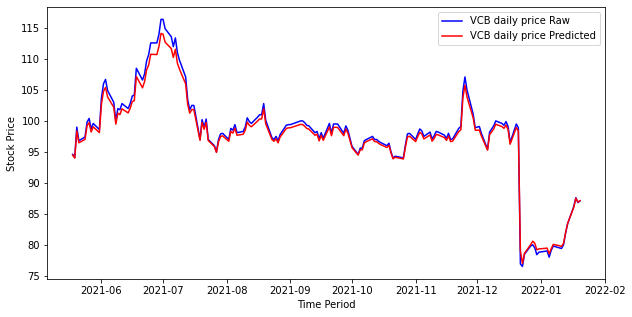

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(tsdata_test.df.date[50:], unscale_y_test[:, :, 0], color='blue', label="VCB daily price Raw")
plt.plot(tsdata_test.df.date[50:], y_pred[1:, :, 0], color='red', label="VCB daily price Predicted")
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.legend()
plt.show()